# Importing of relevant libraries

In [2]:
import pandas as pd
import numpy as np

Libraries for preprocessing:

In [11]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

Libraries for model selection:

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import  RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from numpy import mean
from numpy import std

In [13]:
from sklearn.model_selection import GridSearchCV 
from sklearn.pipeline import Pipeline
from random import randint

Libraries creation of song recommendation system:

In [15]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import preprocessing

In [16]:
from playsound import playsound
import multiprocessing


# Importing of final dataframe

In [17]:
df= pd.read_csv(f'final_dataframe.csv')

In [18]:
df.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.0645,2002.449060,85882.76132,3805.839606,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.0736,2039.036516,213843.75550,3550.522098,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.6434,1747.702312,76254.19226,3042.260232,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.9424,1596.412872,166441.49480,2184.745799,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.9393,1748.172116,88445.20904,3579.757627,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [19]:
y = df['label']
X = df.loc[:, df.columns != 'label']

In [20]:
scaler = preprocessing.MinMaxScaler()
columns = X.columns
d = scaler.fit_transform(X)
scaled_df = pd.DataFrame(d, columns=columns)
scaled_df.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.113487,0.362279,0.695468,0.318188,0.101983,0.314117,0.040233,0.422879,0.109789,0.385532,...,0.564186,0.112704,0.541287,0.057615,0.422444,0.082450,0.487950,0.109503,0.599189,0.078255
1,0.113487,0.343622,0.793392,0.230894,0.085580,0.248405,0.121475,0.436889,0.296867,0.353329,...,0.570198,0.120353,0.574685,0.118286,0.448184,0.102997,0.548800,0.099081,0.579640,0.075947
2,0.113487,0.389832,0.640692,0.433652,0.099064,0.254261,0.049046,0.325334,0.095712,0.289224,...,0.622467,0.081898,0.331003,0.085962,0.370988,0.116420,0.453724,0.087317,0.501381,0.045405
3,0.113487,0.473508,0.777954,0.345856,0.229160,0.129376,0.058253,0.267404,0.227566,0.181068,...,0.565151,0.091876,0.484549,0.092509,0.460684,0.068975,0.538690,0.062612,0.468060,0.048168
4,0.113487,0.277759,0.681062,0.219641,0.083075,0.327270,0.110761,0.325514,0.113536,0.357017,...,0.383289,0.200462,0.410225,0.156424,0.403875,0.120300,0.424652,0.130173,0.233047,0.094836


# Splitting and Scaling of Data

In [21]:
X=scaled_df

In [22]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=9)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 58), (200, 58), (800,), (200,))

# Checking Parameters of Chosen Models

In [24]:
logi=LogisticRegression()
rf=RandomForestClassifier()
svc=SVC()
dt=DecisionTreeClassifier()
kn=KNeighborsClassifier()
gb=GaussianNB()

In [25]:
ensemble_clf=[logi, rf, svc, dt, kn, gb] 

In [26]:
params1={"solver":['newton-cg', 'lbfgs', 'liblinear'],"penalty":['l2'], "C":[100, 10, 1.0, 0.1, 0.01]}
params2={"max_depth":[5,8,15,25,30,None], "min_samples_leaf":[1,2,5,10,15,100],"n_estimators":[10,100,1000]}
params3={"kernel":["rbf", "poly"], "gamma": ["auto", "scale"]}
params4={"criterion":["gini", "entropy"],"max_depth":[3, None], 
         "min_samples_leaf":[1,2,3,4,5,6,7,8, 9]}
params5={"n_neighbors":[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57]}
params6={"var_smoothing": np.logspace(0,-9, num=100)}

In [27]:
parameters_list=[params1, params2, params3, params4, params5, params6]

In [28]:
model_log=["_logi""_rf", "_svc", "_dt", "_kn","_gb"]

In [29]:
LogisticRegression().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [30]:
SVC().get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [31]:
DecisionTreeClassifier().get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [32]:
KNeighborsClassifier().get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [33]:
GaussianNB().get_params().keys()

dict_keys(['priors', 'var_smoothing'])

# Using GridSearchCV to Tune Hyperparameters of Chosen Models

In [34]:
Grid=[]
for i in range(len(ensemble_clf)):
   
    Grid_temp=GridSearchCV(estimator=ensemble_clf[i], param_grid=parameters_list[i], 
                      n_jobs=-1, cv=3, verbose=3).fit(X_train,y_train)
    Grid.append(Grid_temp)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    2.4s finished
/Users/dariastachowiak/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 296 tasks      | elapsed:   55.3s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  1.0min finished


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  12 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   7 out of  12 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s


Fitting 3 folds for each of 57 candidates, totalling 171 fits


[Parallel(n_jobs=-1)]: Done 171 out of 171 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    1.1s finished


In [35]:
result=[]
print(dir(Grid[1]))
for i in range(len(ensemble_clf)):
    result_temp = {'classifier': Grid[i].best_estimator_,'best score': Grid[i].best_score_,'best params': Grid[i].best_params_}
    result.append(result_temp)
print(result)

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_is_fitted', '_check_n_features', '_estimator_type', '_format_results', '_get_param_names', '_get_tags', '_more_tags', '_pairwise', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_required_parameters', '_run_search', '_validate_data', 'best_estimator_', 'best_index_', 'best_params_', 'best_score_', 'classes_', 'cv', 'cv_results_', 'decision_function', 'error_score', 'estimator', 'fit', 'get_params', 'iid', 'inverse_transform', 'multimetric_', 'n_features_in_', 'n_jobs', 'n_splits_', 'param_grid', 'pre_dispatch', 'predict', 'predict_log_proba', 'predict_proba', 're

In [36]:
import operator
result_sorted = sorted(result, key=operator.itemgetter('best score'),reverse=True)
print(result_sorted)

[{'classifier': RandomForestClassifier(max_depth=30, n_estimators=1000), 'best score': 0.7749899092300039, 'best params': {'max_depth': 30, 'min_samples_leaf': 1, 'n_estimators': 1000}}, {'classifier': SVC(kernel='poly'), 'best score': 0.717500680540302, 'best params': {'gamma': 'scale', 'kernel': 'poly'}}, {'classifier': LogisticRegression(C=10), 'best score': 0.7112490965240816, 'best params': {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}}, {'classifier': KNeighborsClassifier(n_neighbors=1), 'best score': 0.6475317507251276, 'best params': {'n_neighbors': 1}}, {'classifier': DecisionTreeClassifier(criterion='entropy', min_samples_leaf=4), 'best score': 0.5975331587395455, 'best params': {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4}}, {'classifier': GaussianNB(var_smoothing=8.111308307896872e-05), 'best score': 0.5674720509138013, 'best params': {'var_smoothing': 8.111308307896872e-05}}]


# Determining Best Model

In [37]:
print(result_sorted[0]['classifier'])
print(result_sorted[0]['best score'])
print(result_sorted[0]['best params'])

RandomForestClassifier(max_depth=30, n_estimators=1000)
0.7749899092300039
{'max_depth': 30, 'min_samples_leaf': 1, 'n_estimators': 1000}


In [38]:
RF_model=result_sorted[0]['classifier']

In [42]:
SVC_model=result_sorted[1]['classifier']

In [43]:
LG_model=result_sorted[2]['classifier']

In [44]:
KNN_model=result_sorted[3]['classifier']

In [45]:
DT_model=result_sorted[4]['classifier']

In [46]:
GB_model=result_sorted[5]['classifier']

In [47]:
models=[SVC_model,LG_model,KNN_model,DT_model,GB_model]

In [49]:
for m in models:
    pred_train=m.predict(X_train)
    pred_test = m.predict(X_test)
    print(m)
    print(accuracy_score(y_test, pred_test))
    print(classification_report(y_test, pred_test))

SVC(kernel='poly')
0.72
              precision    recall  f1-score   support

       blues       0.79      0.85      0.81        26
   classical       0.88      0.93      0.90        15
     country       0.50      0.61      0.55        18
       disco       0.60      0.55      0.57        22
      hiphop       0.82      0.53      0.64        17
        jazz       0.87      0.87      0.87        23
       metal       0.78      0.90      0.84        20
         pop       0.90      0.82      0.86        22
      reggae       0.67      0.59      0.62        17
        rock       0.45      0.50      0.48        20

    accuracy                           0.72       200
   macro avg       0.73      0.71      0.71       200
weighted avg       0.73      0.72      0.72       200

LogisticRegression(C=10)
0.71
              precision    recall  f1-score   support

       blues       0.69      0.77      0.73        26
   classical       0.82      0.93      0.87        15
     country       0.58 

In [39]:
pred_train=RF_model.predict(X_train)

In [40]:
print(accuracy_score(y_train, pred_train))
print(classification_report(y_train, pred_train))

pred_test = RF_model.predict(X_test)
print(accuracy_score(y_test, pred_test))
print(classification_report(y_test, pred_test))


1.0
              precision    recall  f1-score   support

       blues       1.00      1.00      1.00        74
   classical       1.00      1.00      1.00        85
     country       1.00      1.00      1.00        82
       disco       1.00      1.00      1.00        78
      hiphop       1.00      1.00      1.00        83
        jazz       1.00      1.00      1.00        77
       metal       1.00      1.00      1.00        80
         pop       1.00      1.00      1.00        78
      reggae       1.00      1.00      1.00        83
        rock       1.00      1.00      1.00        80

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

0.77
              precision    recall  f1-score   support

       blues       0.95      0.77      0.85        26
   classical       0.72      0.87      0.79        15
     country       0.58      0.83      0.68        18
       disco   

# Actual Vs. Predicted Genre Using our Optimal Random Forest Classifier Model

In [31]:
test_df = X_test.copy()
test_df['Actual'] = y_test
test_df['Prediction'] = pred_test
test_df

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,Actual,Prediction
2,0.113487,0.389832,0.640692,0.433652,0.099064,0.254261,0.049046,0.325334,0.095712,0.289224,...,0.331003,0.085962,0.370988,0.116420,0.453724,0.087317,0.501381,0.045405,blues,country
879,0.095142,0.618823,0.731423,0.191964,0.095212,0.629321,0.355971,0.503892,0.133770,0.573070,...,0.607070,0.031439,0.384409,0.036909,0.491946,0.029898,0.562836,0.027296,reggae,reggae
57,0.113487,0.513368,0.638905,0.434684,0.128805,0.340710,0.081045,0.388727,0.164700,0.388363,...,0.371888,0.055555,0.412203,0.097146,0.493261,0.089770,0.521860,0.084807,blues,blues
496,0.113487,0.514206,0.675822,0.268788,0.049619,0.305957,0.050953,0.349971,0.085204,0.345785,...,0.534912,0.077889,0.431944,0.067828,0.495477,0.067048,0.473243,0.064678,hiphop,hiphop
611,0.095142,0.689406,0.352195,0.574202,0.009010,0.551031,0.011831,0.513883,0.006109,0.556000,...,0.320596,0.028559,0.626435,0.036309,0.468491,0.021324,0.689045,0.023219,metal,metal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,0.113487,0.449233,0.500749,0.408883,0.037096,0.456498,0.034723,0.501603,0.049011,0.513315,...,0.183918,0.025854,0.470235,0.096282,0.543155,0.107995,0.601351,0.061995,rock,metal
441,1.000000,0.515425,0.739355,0.462604,0.412844,0.551738,0.229294,0.677192,0.208416,0.606182,...,0.425509,0.114063,0.292465,0.178067,0.384979,0.207502,0.563479,0.143883,hiphop,hiphop
684,0.095142,0.627650,0.531347,0.571873,0.151761,0.505025,0.075583,0.527463,0.153734,0.547336,...,0.449127,0.068400,0.612353,0.078083,0.431429,0.057793,0.636884,0.045553,metal,disco
582,0.113487,0.466732,0.594992,0.108381,0.013052,0.862828,0.399580,0.930818,0.183271,0.919174,...,0.547095,0.050504,0.393927,0.070689,0.467630,0.053575,0.511730,0.035555,jazz,jazz


# Finding similar songs

Feature ranking:
1. feature 16 (0.041668)
2. feature 1 (0.040826)
3. feature 0 (0.035247)
4. feature 4 (0.029508)
5. feature 3 (0.029197)
6. feature 2 (0.027367)
7. feature 27 (0.026935)
8. feature 7 (0.026923)
9. feature 24 (0.026308)
10. feature 18 (0.026027)
11. feature 9 (0.024313)
12. feature 14 (0.024159)
13. feature 10 (0.022948)
14. feature 5 (0.022110)
15. feature 28 (0.021688)
16. feature 6 (0.020014)
17. feature 57 (0.019617)
18. feature 34 (0.019493)
19. feature 19 (0.018694)
20. feature 40 (0.017287)
21. feature 23 (0.017231)
22. feature 37 (0.017126)
23. feature 32 (0.017037)
24. feature 15 (0.016572)
25. feature 12 (0.016236)
26. feature 50 (0.016171)
27. feature 31 (0.015969)
28. feature 13 (0.015893)
29. feature 11 (0.015478)
30. feature 33 (0.015374)
31. feature 29 (0.015350)
32. feature 20 (0.015335)
33. feature 25 (0.014968)
34. feature 30 (0.014540)
35. feature 36 (0.013646)
36. feature 42 (0.013202)
37. feature 26 (0.013148)
38. feature 55 (0.013104)
39. feature 4

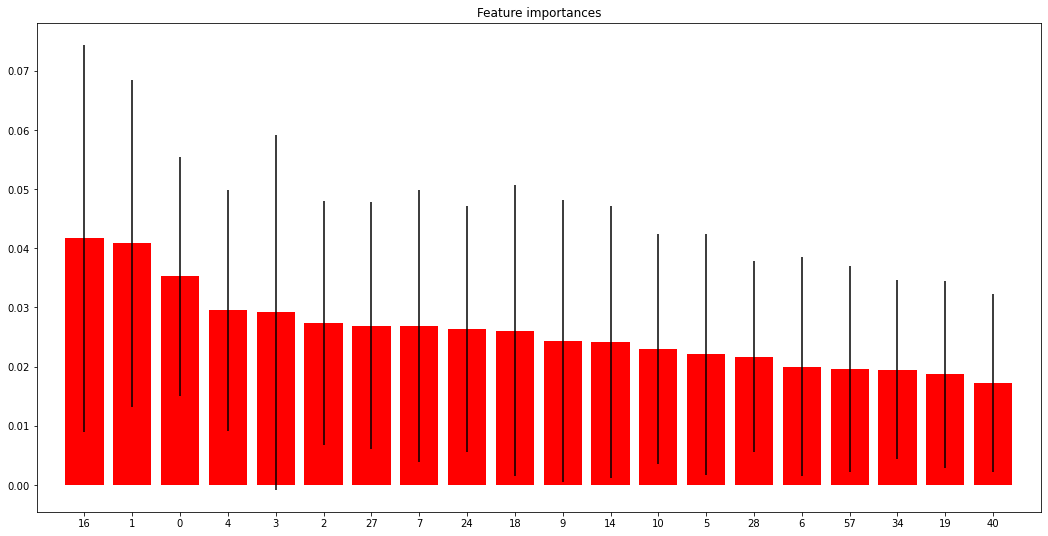

In [126]:
#feature importance
from sklearn.ensemble import ExtraTreesClassifier

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plotting the feature importances of the forest
plt.figure(figsize=(18,9))
plt.title("Feature importances")
n=20
_ = plt.bar(range(n), importances[indices][:n], color="r", yerr=std[indices][:n])
plt.xticks(range(n), indices)
plt.xlim([-1, n])
plt.show()

In [138]:
print(df.columns)

Index(['length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var',
       'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
       'label'

In [60]:
df= pd.read_csv(f'file:///Users/dariastachowiak/Downloads/features_30_sec.csv%20-%20Sheet1.csv',index_col='filename')

In [61]:
df.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
filename,,,,,,,,,,,,,,,,,,,,,
blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.0645,2002.449060,85882.76132,3805.839606,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.0736,2039.036516,213843.75550,3550.522098,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.6434,1747.702312,76254.19226,3042.260232,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.9424,1596.412872,166441.49480,2184.745799,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.9393,1748.172116,88445.20904,3579.757627,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [62]:
labels=df[['label']]

In [63]:
df_similarity=df.drop(columns=['length','label'])

In [64]:
df_similarity.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
filename,,,,,,,,,,,,,,,,,,,,,
blues.00000.wav,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.0645,2002.449060,85882.76132,3805.839606,9.015054e+05,...,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035
blues.00001.wav,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.0736,2039.036516,213843.75550,3550.522098,2.977893e+06,...,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282
blues.00002.wav,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.6434,1747.702312,76254.19226,3042.260232,7.840345e+05,...,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025
blues.00003.wav,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.9424,1596.412872,166441.49480,2184.745799,1.493194e+06,...,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339
blues.00004.wav,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.9393,1748.172116,88445.20904,3579.757627,1.572978e+06,...,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160


In [65]:
df_scaled=preprocessing.scale(df_similarity)

In [66]:
cosine_sim=cosine_similarity(df_scaled)

In [67]:
cosine_sim_df_labels=pd.DataFrame(cosine_sim)
cosine_sim_df_names=cosine_sim_df_labels.set_index(labels.index)
cosine_sim_df_names.columns=labels.index

In [68]:
cosine_sim_df_names.head()

filename,blues.00000.wav,blues.00001.wav,blues.00002.wav,blues.00003.wav,blues.00004.wav,blues.00005.wav,blues.00006.wav,blues.00007.wav,blues.00008.wav,blues.00009.wav,...,rock.00090.wav,rock.00091.wav,rock.00092.wav,rock.00093.wav,rock.00094.wav,rock.00095.wav,rock.00096.wav,rock.00097.wav,rock.00098.wav,rock.00099.wav
filename,,,,,,,,,,,,,,,,,,,,,
blues.00000.wav,1.000000,0.049231,0.589618,0.284862,0.025561,-0.346688,-0.219483,-0.167626,0.641877,-0.097889,...,-0.082828,0.546169,0.578558,0.662590,0.571629,0.610942,0.640835,0.496294,0.284957,0.304097
blues.00001.wav,0.049231,1.000000,-0.096834,0.520903,0.080749,0.307856,0.318285,0.415258,0.120649,0.404168,...,-0.098111,-0.325127,-0.370792,-0.191698,-0.330834,-0.077301,-0.222120,-0.302573,0.499562,0.311723
blues.00002.wav,0.589618,-0.096834,1.000000,0.210411,0.400266,-0.082020,-0.028061,0.104446,0.468113,-0.132533,...,-0.032408,0.561074,0.590779,0.583293,0.514536,0.495707,0.566837,0.589983,0.216377,0.321068
blues.00003.wav,0.284862,0.520903,0.210411,1.000000,0.126437,0.134796,0.300745,0.324566,0.352758,0.295184,...,-0.320107,-0.206516,-0.151132,0.041985,-0.172516,-0.000288,0.020514,-0.107821,0.502278,0.183210
blues.00004.wav,0.025561,0.080749,0.400266,0.126437,1.000000,0.556066,0.482195,0.623455,0.029703,0.471657,...,0.087606,0.017366,0.138035,0.104683,-0.034594,0.063453,0.063546,0.172944,0.153192,0.061785


In [69]:
cosine_sim_df_names.shape

(1000, 1000)

In [74]:
def song_recommendations(name):
    song_list=cosine_sim_df_names[name].sort_values(ascending=False)
    song_list=song_list.drop(name)
    
    print("Top 3 most similar songs", name)
    print(song_list.head(3))
    

In [75]:
song_recommendations('blues.00004.wav')

Top 3 most similar songs blues.00004.wav
filename
country.00093.wav    0.705598
country.00071.wav    0.678296
jazz.00002.wav       0.641255
Name: blues.00004.wav, dtype: float64


In [77]:
pip install playsound

Note: you may need to restart the kernel to use updated packages.


In [ ]:
p = multiprocessing.Process(target=playsound, args=("country.00093.wav",))
p.start()
input("press ENTER to stop playback")
p.terminate()

In [ ]:
playsound()